In [4]:
pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.8 MB/s eta 0:00:00


Iteration 0: Cost = 79274.8125, w = 6.5000, b = 4.0000
Iteration 10: Cost = 39475.1597, w = 60.4384, b = 37.1642
Iteration 20: Cost = 19660.2806, w = 98.5190, b = 60.5291
Iteration 30: Cost = 9795.0827, w = 125.4104, b = 76.9798
Iteration 40: Cost = 4883.4647, w = 144.4064, b = 88.5522
Iteration 50: Cost = 2438.0524, w = 157.8315, b = 96.6828
Iteration 60: Cost = 1220.4742, w = 167.3255, b = 102.3851
Iteration 70: Cost = 614.1905, w = 174.0457, b = 106.3742
Iteration 80: Cost = 312.2492, w = 178.8085, b = 109.1548
Iteration 90: Cost = 161.8301, w = 182.1900, b = 111.0829

Optimized parameters: w = 184.3911, b = 112.2986


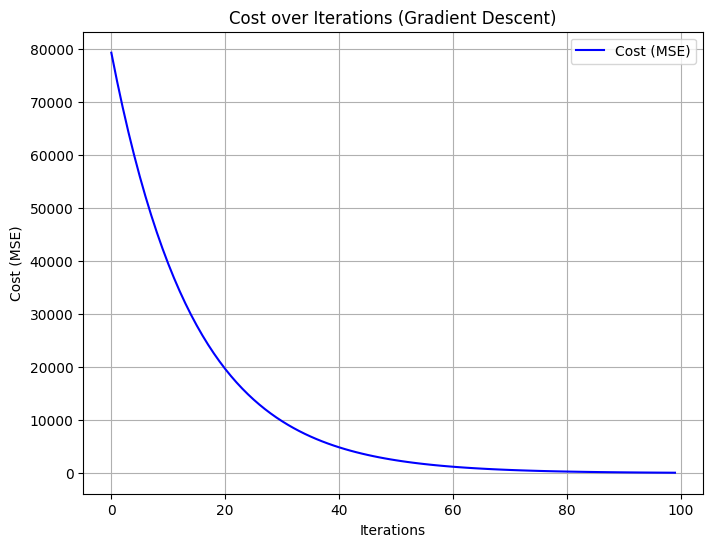

In [6]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
#from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


x_train = np.array([1.0, 2.0])  # Input feature
y_train = np.array([300.0, 500.0])  # Target output

def compute_cost(x, y, w, b):
    m = len(x)  # Number of training examples
    total_cost = 0

    # Compute the squared errors for each training example
    for i in range(m):
        y_pred = w * x[i] + b  # Predicted value
        total_cost += (y_pred - y[i]) ** 2  # Squared error

    # Return the average squared error (MSE)
    return total_cost / (2 * m)

def gradient_descent(x, y, w_in, b_in, alpha, n_iterations):
    m = len(x)  # Number of training examples
    w = copy.deepcopy(w_in)  # Initialize weight
    b = b_in  # Initialize bias
    cost_history = []  # Store the cost at each iteration

    for i in range(n_iterations):
        # Initialize gradients
        dw = 0
        db = 0

        # Compute the gradients for each training example
        for j in range(m):
            y_pred = w * x[j] + b
            dw += (y_pred - y[j]) * x[j]  # Gradient w.r.t. weight
            db += (y_pred - y[j])         # Gradient w.r.t. bias

        # Average the gradients
        dw /= m
        db /= m

        # Update weight and bias using gradient descent rule
        w -= alpha * dw
        b -= alpha * db

        # Calculate and store the cost
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Print progress every 10 iterations
        if i % 10 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history

# Hyperparameters
alpha = 0.01  # Learning rate
n_iterations = 100  # Number of iterations

# Initial values for weight and bias
w_init = 0
b_init = 0

# Run gradient descent optimization
w_opt, b_opt, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, n_iterations)

print(f"\nOptimized parameters: w = {w_opt:.4f}, b = {b_opt:.4f}")

# Plotting cost history over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), cost_history, 'b-', label='Cost (MSE)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost over Iterations (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()
